### Info
Plotting comparisons

In [1]:
import numpy as np
import pandas as pd

### Load data into a DataFrame

In [2]:
min_ind = 1
max_ind = 2

model_names = ('hls','qkeras','qonnx_init','qonnx_mod')
pred_all = []   # will be a list of arrays from each model

for model_name in model_names:
    pred_single = np.array([])
    for file_index in range(min_ind, max_ind+1):
        data = np.load('./pred_GluGluHToBB_M125/preds_'+model_name+str(file_index)+'.npy')
        pred_single = np.append(pred_single,data)
        #print(pred_single.shape)
    pred_all.append(pred_single)

pred_all = np.array(pred_all).T

In [3]:
pred_all.shape

(4096, 4)

In [4]:
df = pd.DataFrame(pred_all, columns=model_names)
df['hls'].value_counts().sort_index()

hls
12.000      1
16.750      1
22.500      1
31.500      1
36.000      1
           ..
4129.625    1
4139.125    1
4146.750    1
4795.125    1
6853.000    1
Name: count, Length: 3278, dtype: int64

### Compare predictions

In [5]:
df['qxinit_qkeras'] = df['qonnx_init'] - df['qkeras']
df['qxinit_qkeras'].value_counts()

qxinit_qkeras
0.0    4096
Name: count, dtype: int64

modified vs unmodified qonnx with respect to hls

In [6]:
df['qxinit_hls'] = df['qonnx_init'] - df['hls']
df['qxmod_hls'] = df['qonnx_mod'] - df['hls']

print(df['qxinit_hls'].value_counts())
print(df['qxmod_hls'].value_counts())

qxinit_hls
-2.250    244
-2.125    219
-2.625    218
-1.875    209
-2.500    207
-2.000    190
-1.750    182
-2.375    181
-2.875    175
-1.625    167
-3.000    158
-2.750    151
-3.250    140
-3.125    124
-1.500    119
-3.375    116
-3.500    113
-1.375    107
-1.250     92
-3.875     88
-3.750     86
-3.625     85
-4.125     65
-4.000     65
-4.375     60
-1.125     56
-1.000     55
-4.500     47
-4.250     45
-4.625     38
-0.875     35
-4.875     29
-4.750     29
-5.250     22
-5.000     20
-5.125     19
-5.500     17
-5.375     16
-0.750     14
-0.625     13
-5.750      9
-5.875      8
-5.625      7
-6.750      7
-0.500      7
-6.500      6
-0.375      5
-6.875      5
-6.625      4
-6.125      4
-7.000      3
-6.250      3
-6.000      3
 0.000      2
-6.375      2
-7.500      2
 0.125      1
-9.000      1
-0.125      1
Name: count, dtype: int64
qxmod_hls
-1.250     206
-1.500     205
-1.750     199
-2.000     191
-2.250     181
          ... 
-9.500       1
-9.000       1
-10.125

### Create histograms

In [14]:
import matplotlib.pyplot as plt

In [7]:
dfpl = pd.DataFrame([df['qxinit_hls'].value_counts(),df['qxmod_hls'].value_counts()])
dfpl = dfpl.transpose()
dfpl.columns = ['init','mod']
dfpl = dfpl.fillna(0)
dfpl /= dfpl['init'].sum()
dfpl *= 100
dfpl = dfpl.sort_index()
#dfpl.index[500]

In [8]:
dfpl

,init,mod
-13.750,0.000000,0.024414
-10.625,0.000000,0.024414
-10.500,0.000000,0.024414
-10.375,0.000000,0.048828
-10.250,0.000000,0.122070
...,...,...
-0.250,0.000000,0.170898
-0.125,0.024414,0.073242
0.000,0.048828,0.000000
0.125,0.024414,0.000000


In [9]:
dfpl['abs_index'] = dfpl.index.map(lambda x: np.abs(x))
dfpl

,init,mod,abs_index
-13.750,0.000000,0.024414,13.750
-10.625,0.000000,0.024414,10.625
-10.500,0.000000,0.024414,10.500
-10.375,0.000000,0.048828,10.375
-10.250,0.000000,0.122070,10.250
...,...,...,...
-0.250,0.000000,0.170898,0.250
-0.125,0.024414,0.073242,0.125
0.000,0.048828,0.000000,0.000
0.125,0.024414,0.000000,0.125


In [10]:
def categ(x):
    if x==0.0 : return '0.0'
    if x < 1. : return '0-1'
    if x < 5. : return '1-5'
    if x < 10. : return '5-10'
    if x < 15. : return '10-15'
    return 'more'

In [11]:
# Categorize differences (deviations from hls preds)
dfpl['cat'] = dfpl['abs_index'].map(categ)

catdf = dfpl.groupby('cat').sum()
catdf

,init,mod,abs_index
cat,,,
0-1,1.855469,4.809570,3.875
0.0,0.048828,0.000000,0.000
1-5,94.238281,83.618164,94.000
10-15,0.000000,0.292969,75.625
5-10,3.857422,11.279297,269.875


In [12]:
catdf = catdf.reindex(['0.0','0-1','1-5','5-10','10-15','more'])
catdf

,init,mod,abs_index
cat,,,
0.0,0.048828,0.000000,0.000
0-1,1.855469,4.809570,3.875
1-5,94.238281,83.618164,94.000
5-10,3.857422,11.279297,269.875
10-15,0.000000,0.292969,75.625
more,NaN,NaN,NaN


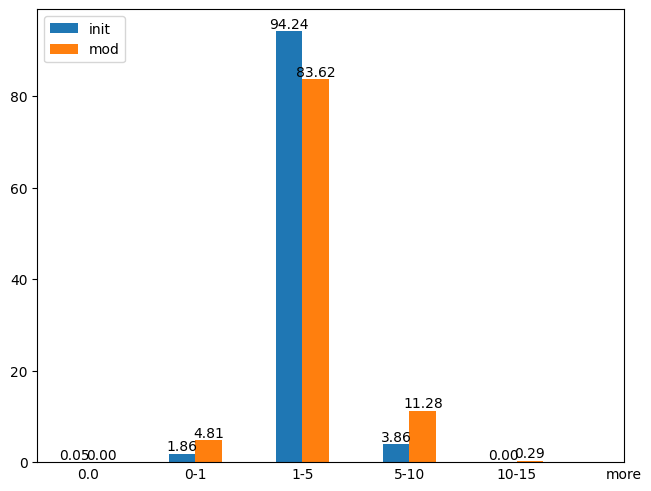

In [17]:
fig, ax = plt.subplots(layout='constrained')
width = 0.25
xticks = np.arange(catdf.shape[0])

for i in range(len(catdf.keys())-1):
    b = ax.bar(xticks+(-1+i)*width, catdf.values[:,i], width, label=catdf.keys()[i], align='edge')
    ax.bar_label(b, fmt='{:.2f}')

ax.legend()
ax.set_xticks(xticks)
ax.set_xticklabels(catdf.index.to_list())
#ax.set_yscale('log')
ax.xaxis.set_tick_params(length=0)